In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop,SGD
import numpy as np
import cv2
import os
from os import listdir
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob
from numpy import asarray
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


In [2]:
#preparing training datasets
x_train=[]
y_train=[]
path1=('C:/Users/ENVY/Desktop/Covid19-dataset/train/Covid/*.*')
for img in glob.glob(path1):
    #print(img)
    a=cv2.imread(img)        #reading images in numpy array
    a=cv2.resize(a,(100,100)) #resize the images to be in the same shape
    x_train.append(a/255)         #append all the images in the x_train dataset
    y_train.append(1)         #assign value of 0 to y_train
    
path2=('C:/Users/ENVY/Desktop/Covid19-dataset/train/Normal/*.*')
for img in glob.glob(path2):
    #print(img)
    a=cv2.imread(img)          #reading images in numpy array
    a=cv2.resize(a,(100,100)) #resize the images to be in the same shape
    x_train.append(a/255)         #append all the images in the x_train dataset
    y_train.append(0)         #assign value of 0 to y_train 


#preparing testing dataset

x_test=[]
y_test=[]
path3=('C:/Users/ENVY/Desktop/Covid19-dataset/test/Covid/*.*')
for img in glob.glob(path3):
    #print(img)
    a=cv2.imread(img)        #reading images in numpy array
    a=cv2.resize(a,(100,100)) #resize the images to be in the same shape
    x_test.append(a/255)         #append all the images in the x_train dataset
    y_test.append(1)         #assign value of 0 to y_train
    
path4=('C:/Users/ENVY/Desktop/Covid19-dataset/test/Normal/*.*')
for img in glob.glob(path4):
    #print(img)
    a=cv2.imread(img)          #reading images in numpy array
    a=cv2.resize(a,(100,100)) #resize the images to be in the same shape
    x_test.append(a/255)         #append all the images in the x_train dataset
    y_test.append(0)         #assign value of 0 to y_train 

x_train=np.array(x_train)
x_test=np.array(x_test)

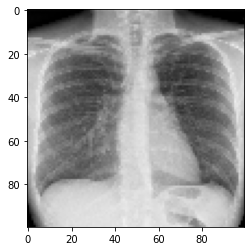

In [3]:
plt.imshow(x_train[90])

In [4]:
# #convert to an array
# x_train=np.array(x_train)
# x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [5]:
len(x_train)

181

In [6]:
print(x_test)

[[[[0.79607843 0.79607843 0.79607843]
   [0.73333333 0.73333333 0.73333333]
   [0.70588235 0.70588235 0.70588235]
   ...
   [0.1254902  0.1254902  0.1254902 ]
   [0.1254902  0.1254902  0.1254902 ]
   [0.12156863 0.12156863 0.12156863]]

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]]

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.10196078 0.10196078 0.10196078]
   [0.03529412 0.03529412 0.03529412]
   [0.02745098 0.02745098 0.02745098]]

  [[0.02352941 0.02352941 0.02352941]
   [0.0

In [7]:
#changing datatype
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [21]:
# Create a model with dropout
drop=0.15

#instantiate a CNN model

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer =  'he_uniform',input_shape=(100, 100, 3)))
model1.add(MaxPooling2D((2, 2),strides=2))
#model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=2))
#model1.add(Dropout(drop))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=2))
#model1.add(Dropout(drop))

# model1.add(Conv2D(256, (3, 3), activation='relu'))
# model1.add(MaxPooling2D((2, 2)))
# model1.add(Dropout(drop))

model1.add(Flatten())

model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(drop))
model1.add(Dense(1, activation='sigmoid'))

opt1 = SGD(lr=0.01, momentum=0.9)
# opt2 = RMSprop(lr=0.001, decay=1e-6)
#opt3=adam
model1.compile(optimizer=opt1, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 128)     

In [22]:
#fitting the model
model=model1.fit(x_train,y_train,
                batch_size=6,
                epochs=40,
                validation_data=(x_test,y_test))

Epoch 1/40
31/31 [==============================] - 4s 92ms/step - loss: 0.6867 - accuracy: 0.5470 - val_loss: 0.6143 - val_accuracy: 0.5000
Epoch 2/40
31/31 [==============================] - 2s 78ms/step - loss: 0.5629 - accuracy: 0.7348 - val_loss: 0.3999 - val_accuracy: 0.9130
Epoch 3/40
31/31 [==============================] - 2s 78ms/step - loss: 0.3150 - accuracy: 0.9116 - val_loss: 0.3734 - val_accuracy: 0.8478
Epoch 4/40
31/31 [==============================] - 2s 78ms/step - loss: 0.2048 - accuracy: 0.9227 - val_loss: 0.1221 - val_accuracy: 0.9348
Epoch 5/40
31/31 [==============================] - 2s 79ms/step - loss: 0.1794 - accuracy: 0.9392 - val_loss: 0.1989 - val_accuracy: 0.9348
Epoch 6/40
31/31 [==============================] - 2s 78ms/step - loss: 0.1350 - accuracy: 0.9779 - val_loss: 0.1583 - val_accuracy: 0.9565
Epoch 7/40
31/31 [==============================] - 2s 78ms/step - loss: 0.1989 - accuracy: 0.9558 - val_loss: 0.2988 - val_accuracy: 0.9130
Epoch 8/40
31

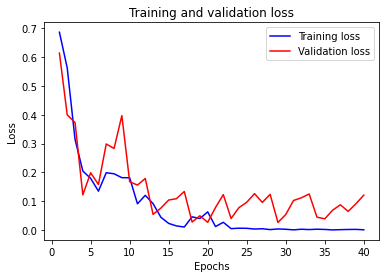

In [23]:
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

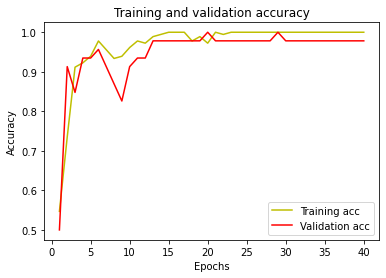

In [24]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 0s 35ms/step


<AxesSubplot:>

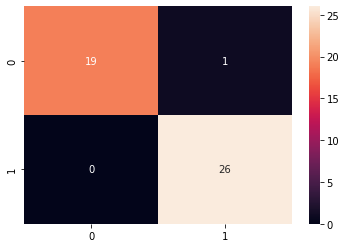

In [25]:
model_pred=model1.predict(x_test)
model_pred=(model_pred>0.5)
#print(model_pred)
cm=confusion_matrix(y_test,model_pred)
sns.heatmap(cm,annot=True)

In [26]:
scores = model1.evaluate(x_test, y_test, verbose=0)
scores
print("test loss, test acc:", scores)

test loss, test acc: [0.12108682841062546, 0.97826087474823]


In [14]:
#classification report
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      0.96      0.98        26

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



In [15]:
true_positive=cm.sum(0)
true_positive

array([21, 25], dtype=int64)

In [16]:
#precision and recall
true_positive=25
false_positive=0
true_negative=20
false_negative=1
precision=(true_positive*100)/(true_positive+false_positive)
print('the precision is', precision)
recall=(true_positive*100)/(true_positive+false_negative)
print('the recall is', recall)
f1_score=((precision*recall)/(precision+recall))*2
print('f1 score is', f1_score)

the precision is 100.0
the recall is 96.15384615384616
f1 score is 98.0392156862745
